# Explore Then Commit (ETC)

In this exercise, we will be experimenting with the Multi-armed bandit problem with the Explore Then Commit (ETC) algorithm.

## Setup

Consider an unstructured bandit problem. Suppose that we have $k$ arms, each with random reward at time $t$ given by $rew[t] = avg[t] + \epsilon[t]$ where $\epsilon[t]$ is drawn from an i.i.d. standard Gaussian distribution. Note that we only require $\epsilon[t]$ to be sub-Gaussian for the analysis to go through.

The following code should be implemented to capture this setup.

# Reward function

Question: Implement the reward function described in the setup. Specifically, given a $k$- dimensional vector 'avg', return $k$- dimensional vector 'rew' such that
$rew[t] = avg[t] + \epsilon[t]$ where $\epsilon[t] \sim \mathcal{N}(0,I)$ where $I$ 
is the identity matrix of size $k \times k$.

In [86]:
def get_reward(avg):
    rew = avg + np.random.multivariate_normal(np.zeros(len(avg)),np.identity(len(avg)))
    return rew

## Algorithm review
Recall there are three parameters of interest in the ETC algoritm: $(n, k, m),$ where $n$ is the time horizon, $k$ is the number of arms and $m$ is an algorithm parameter. Please refer to the lecture notes and the text book for details.

The parameter to set: the exploration time m\*k

1. Choose each arm in the round-robin fashion until each arm is played m times
2. Compute the empirical reward estimate for each arm
3. Choose the best arm (according to the empirical reward estimate) until the end of the game

## Goal of this exercise

Implement the following using the template provided below. Please use the variable names suggested in the comments.

1. Basic ETC algorithm implementation
2. Plot the expected cumulative regret of ETC vs. horizon ($n$).



# Import Dependencies

In [88]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import math

## ETC
Question: 
Implement ETC using the skeleton below. The initialization part is done. Fill out the rest of the skeleton.

In [113]:
class ETC():
    def __init__(self, avg, m): ## Initialization

        self.means = avg
        self.m = m
        self.num_arms = avg.size
        self.best_arm = np.argmax(avg)
        self.restart() 

        ## variable names (most are self explanatory)
        ## self.num_arms is the number of arms (k)
        ## self.means[arm] is the vector of true means of the arms
        ## self.time is the current time index (this is t in the description at the top of this page)
        ## self.best_arm is the best arm given the true mean rewards
        ## self.cum_reg is the cumulative regret
        ## self.emp_means[arm] is the vector of empirical means of arms
        ## self.num_pulls[arm] is the vector of number of times that arm k has been pulled

    
    def restart(self): ## Restart the algorithm: Reset the time index to zero (done), the values of the empirical means, 
                     ## number of pulls, and cumulative regret to zero.
        self.time = 0.0
        self.emp_means = np.zeros(self.num_arms)
        self.num_pulls = np.zeros(self.num_arms)
        self.cum_reg = [0]

    
    def get_best_arm(self): ## For each time index, find the best arm according to ETC.
        if self.time <= self.m * self.num_arms:
            if self.time == self.m * self.num_arms:
                global temp
                temp = self.emp_means
            return int(self.time % self.num_arms)
        else:
            return np.argmax(temp)

    def update_stats(self, rew, arm): ## Update the empirical means, the number of pulls, and increment the time index
        self.time += 1.0
        self.num_pulls[arm] += 1.0
        self.emp_means[arm] = (self.emp_means[arm] * (self.num_pulls[arm] - 1.0) + rew[arm])/self.num_pulls[arm]

    def update_reg(self,rew_vec,arm): ## Update the cumulative regret
        self.cum_reg += [self.cum_reg[-1] + rew_vec[self.best_arm] - rew_vec[arm]]
        
    def iterate(self, rew_vec): ## Iterate the algorithm
        arm = self.get_best_arm()
        self.update_stats(rew_vec, arm)
        self.update_reg(rew_vec, arm)

# Experiment Function
The following code runs the ETC algorithm for multiple instances. In the code below, num_inst is the number of instances, and num_iter is the time horizon.

In [101]:
def run_algo(avg, m, num_iter, num_inst):
    
    reg = np.zeros((num_inst, num_iter))
    algo = ETC(avg, m)
    
    for j in range(num_inst):
        algo.restart()
        
        if (j+1) % 10 == 0:
            print('Instance number = ', j+1)
        
        for t in range(num_iter-1):
            rew_vec = get_reward(avg)
            algo.iterate(rew_vec)
            
        reg[j,:]= np.asarray(algo.cum_reg)
        
    return reg

# Initializations
Use the following to initialize your algorithm. The value of $k$ is implicitly set to $6$ in the initialization below. (You can change the number of arms $k$ and their values in the avg vector in any manner to test your algorithm. This vector contains the actual mean rewards). $m$ below has been set to $1$ as a default. Update this to reflect the correct initialization.

In [102]:
avg = np.asarray([0.6, 0.9, 0.95, 0.8, 0.7, 0.3])
num_iter,num_inst = int(1e4),30
sort = np.sort(avg)[::-1]
delta = sort[0] - sort[len(avg) - 1]
m = max(1, math.ceil(4/0.2**2 * math.log(num_iter * 0.2**2/4)) ) ## Your code to update m here. (Hint: Use equation (6.5) in the book)

# Run Experiment

In [114]:
reg = run_algo(avg, m, num_iter, num_inst)

Instance number =  10
Instance number =  20
Instance number =  30


## Plotting the Results

Questions: \
1 - Compute the average regret over the number of instances and plot it against the horizon. Label the x-axis as time, and the y-axis as Cumulative Regret. Add a caption labeling this as 'Cumulative Regret with ETC'.\
2 - Plot a vertical line at $x = len(avg) * m $. 

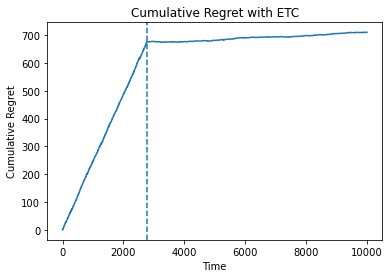

In [110]:
# Compute average regret over the number of instances
avg_regret = np.mean(reg, axis=0)

plt.plot(np.mean(reg,0))
plt.xlabel('Time')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret with ETC')

plt.axvline(x=len(avg) * m, linestyle='--')
plt.show()